In [1]:
# 1. Change display options to 5 columns, 5 rows, and 75 characters.
import pandas as pd
pd.set_option("display.max_columns", 5)
pd.set_option("display.max_rows", 5)
pd.set_option("display.width", 75)

In [2]:
# 2. Import data from HW4.csv into data frame, and print the data.
"""
# Age: customer's age in completed years
Education: 1=undergrad; 2=grad; 3=advanced/professional
Experience: years of professional experience
Family: family size
Zip: home address zip code
Income: annual income in $,000
Mortgage: value of house mortgage if any in $,000
Credit: average monthly spending on credit cards in $,000
Loan: Does the customer have a personal loan?
Securities: Does the customer have a securities account?
Deposit: Does the customer have a certificate of deposit account?
Online: Does the customer use internet banking?
Card: Does the customer use a credit card?
"""
# [5000 rows x 13 columns]
dfHW4 = pd.read_csv("HW4.csv")
print(dfHW4)

      Age  Experience  ...  Online  Card
0      25           1  ...       0     0
1      45          19  ...       0     0
...   ...         ...  ...     ...   ...
4998   65          40  ...       1     0
4999   28           4  ...       1     1

[5000 rows x 13 columns]


In [9]:
# 3. Reset display option to all rows.
pd.reset_option("display.max_rows")
# 3.1 Report all unique ages in the ascending order.
import numpy as np
df2=dfHW4["Age"].unique()
df2=np.sort(df2)
df2
#3.2 Report all descriptive statistics on ages.
print(dfHW4['Age'].max())
print(dfHW4['Age'].min())
print(dfHW4['Age'].mean())
print(dfHW4['Age'].describe())
df2

67
23
45.3384
count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

In [3]:
# 4. Reset display option to all available columns.
pd.reset_option("display.max_columns")
# 4.1 Report the data, where five columns Loan, Securities, Deposit, Online and Card are all 1.
dfHW4[(dfHW4.Loan == 1) & (dfHW4.Securities==1) & (dfHW4.Deposit==1) & (dfHW4.Online==1) & (dfHW4.Card==1)]
# [10 rows x 13 columns]
# reference https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining

,Age,Experience,Education,Family,Zip,Income,Mortgage,Credit,Loan,Securities,Deposit,Online,Card
47,37,12,3,4,91380,194,211,0.2,1,1,1,1,1
782,54,30,3,3,92056,194,587,6.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,39,14,1,4,93302,141,0,6.3,1,1,1,1,1
4823,46,21,3,2,95616,115,0,4.2,1,1,1,1,1


In [4]:
# 5. For each year of professional experience, what are the averages per year per column.
Exp = pd.DataFrame(dfHW4)
# create group object
Avg_Exp = Exp.groupby("Experience")
Avg_Exp.mean()
# [47 rows x 12 columns]

,Age,Education,Family,Zip,Income,Mortgage,Credit,Loan,Securities,Deposit,Online,Card
Experience,,,,,,,,,,,,
-3,23.500000,2.250000,3.250000,92029.000,68.250000,36.250000,2.900000,0.0,0.000000,0.000000,0.750000,0.000000
-2,24.066667,2.133333,2.400000,92724.800,82.466667,21.800000,2.656667,0.0,0.266667,0.000000,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
42,66.500000,2.125000,2.125000,93547.625,50.125000,44.250000,1.050000,0.0,0.000000,0.000000,0.750000,0.625000
43,67.000000,1.666667,3.333333,93117.000,75.000000,71.666667,1.500000,0.0,0.000000,0.333333,0.666667,0.333333


In [5]:
# 6. For each combination among five columns Loan, Securities, Deposit, Online and Card, 
#how many records per combination?
df5 = pd.DataFrame(dfHW4)
df5.groupby(['Loan','Securities','Deposit','Online','Card']).size().reset_index().rename(columns={0:'Count'})
# # 6.1 After counting by any column, rename that column header to "Count".
# # [22 rows x 6 columns]
#https://www.codegrepper.com/code-examples/python/combination+of+2+columns+count+in+pandas+ source


,Loan,Securities,Deposit,Online,Card,Count
0,0,0,0,0,0,1168
1,0,0,0,0,1,477
...,...,...,...,...,...,...
20,1,1,1,1,0,31
21,1,1,1,1,1,10


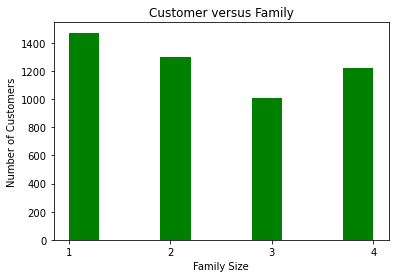

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [6]:
# 7. Report frequency counts on Family sizes.
import matplotlib.pyplot as plt 
Freq = pd.DataFrame(dfHW4)
FreqCounts = Freq.Family.value_counts()
FreqCounts
# 7.1 Hide the grid lines.
plt.grid(False)
# 7.2 Set the family size ticks in the range between 1 and maximum family size to show only integers.
plt.hist(dfHW4["Family"],facecolor='g')
plt.xticks([1,2,3,4])
# 7.3 Label the family size axis.
plt.xlabel("Family Size")
# plt.xticks([1,2,3,4])
 # 7.4 Label the other axis as Number of Customers.
plt.ylabel("Number of Customers")
# 7.5 Label the figure title as Customer versus Family.
plt.title("Customer versus Family")
plt.show()
FreqCounts

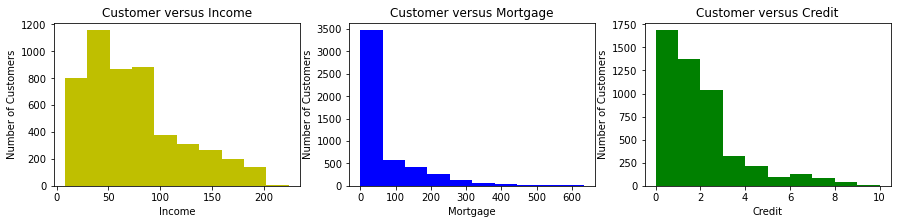

In [7]:
# 8. Report three subplots on one 15"x3" figure as follows:
plt.figure(figsize=(15,3))
# 8.1 On the left, report distribution on Income with proper labels and title.  y label number of customers.
plt.subplot(131)
plt.hist(dfHW4["Income"],facecolor='y')
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.title("Customer versus Income")
# 8.2 On the center, report distribution on Mortgage with proper labels and title.
plt.subplot(132)
plt.hist(dfHW4["Mortgage"],facecolor='b')
plt.xlabel("Mortgage")
plt.ylabel("Number of Customers")
plt.title("Customer versus Mortgage")
# 8.3 On the right, report distribution on Credit with proper labels and title.
plt.subplot(133)
plt.hist(dfHW4["Credit"],facecolor='g')
plt.xlabel("Credit")
plt.ylabel("Number of Customers")
plt.title("Customer versus Credit")
plt.show()
#source https://www.kaggle.com/asimislam/tutorial-python-subplots

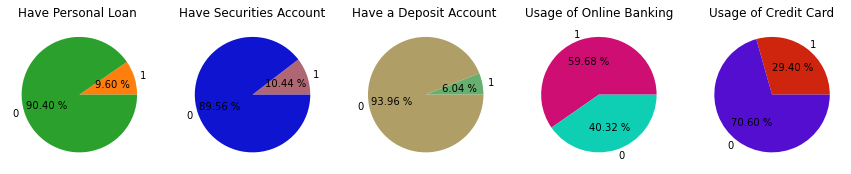

In [28]:
# 9. Report five pie subplots on one 15"x3" figure as follows:
plt.figure(figsize=(15,3))
# 9.1 From left to right, report distribution on Loan, Securities, Deposit, Online and Card, each with proper title.
plt.subplot(151)
left=dfHW4.loc[dfHW4['Loan']==1].count()[0]
right=dfHW4.loc[dfHW4['Loan']==0].count()[0]
labels=['1','0']
colors=['#ff7f0e','#2ca02c']
plt.pie([left,right],labels=labels,colors=colors,autopct='%.2f %%')
plt.title('Have Personal Loan ')

plt.subplot(152)
left_1=dfHW4.loc[dfHW4['Securities']==1].count()[0]
right_1=dfHW4.loc[dfHW4['Securities']==0].count()[0]
labels=['1','0']
colors=['#af6774','#0e14cf']
plt.pie([left_1,right_1],labels=labels,colors=colors,autopct='%.2f %%')
plt.title('Have Securities Account')

plt.subplot(153)
left_2=dfHW4.loc[dfHW4['Deposit']==1].count()[0]
right_2=dfHW4.loc[dfHW4['Deposit']==0].count()[0]
labels=['1','0']
colors=['#67af6f','#af9f67']
plt.pie([left_2,right_2],labels=labels,colors=colors,autopct='%.2f %%')
plt.title('Have a Deposit Account ')

plt.subplot(154)
left_3=dfHW4.loc[dfHW4['Online']==1].count()[0]
right_3=dfHW4.loc[dfHW4['Online']==0].count()[0]
labels=['1','0']
colors=['#cf0e74','#0ecfb4']
plt.pie([left_3,right_3],labels=labels,colors=colors,autopct='%.2f %%')
plt.title('Usage of Online Banking')

plt.subplot(155)
left_4=dfHW4.loc[dfHW4['Card']==1].count()[0]
right_4=dfHW4.loc[dfHW4['Card']==0].count()[0]
labels=['1','0']
colors=['#cf250e','#540ecf']
plt.pie([left_4,right_4],labels=labels,colors=colors,autopct='%.2f %%')
plt.title('Usage of Credit Card')

plt.show()

# 9.2 Each pie subplot should be labeled with 0 and 1 on two colors.
#reference https://www.youtube.com/watch?v=GOuUGWGUT14&t=1s

In [10]:
# 10. Report numbers of customers for each education level then for each zip code using a treemap.
import plotly.express as px
Report=dfHW4.groupby("Education")[["Zip"]].count()
Report
dfHW4.columns=["Age","Experience","Education","Family","Zip","Income","Mortgage,"
"Credit","Loan","Securities","Deposit","Online","Card","Report"]

fig=px.treemap(dfHW4,path=["Education","Zip"],values="Report")
fig.show()

ModuleNotFoundError: No module named 'plotly'